In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,NaN,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [5]:
df.dropna(axis=0, how='any',inplace=True)

In [6]:
df['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [7]:
df['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
219k                     1
25k                      1
28k                      1
173k                     1
24k                      1
Name: Size, Length: 413, dtype: int64

*Cleaning several columns in order to proceed with the analysis*

In [8]:
df['Size'] = df['Size'].apply(lambda x : x.strip('M'))
df['Size'] = df['Size'].apply(lambda x : x.strip('k'))
df.drop(df.index[df['Size'] == 'Varies with device'], inplace = True)
df['Size']= df['Size'].astype(float)

In [9]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+'))
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',',''))
df['Installs']= df['Installs'].astype(int)

In [10]:
df['Type'].value_counts()

Free    7146
Paid     577
Name: Type, dtype: int64

In [11]:
df['Price'].value_counts()

0         7146
$0.99      105
$2.99      101
$4.99       63
$1.99       53
          ... 
$7.49        1
$1.59        1
$2.00        1
$3.88        1
$1.50        1
Name: Price, Length: 68, dtype: int64

In [12]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))
df['Price']= df['Price'].astype(float)

In [13]:
df['Content Rating'].value_counts()

Everyone           6166
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [14]:
df['Genres'].value_counts()

Tools                                    633
Entertainment                            448
Education                                417
Medical                                  324
Action                                   322
                                        ... 
Music & Audio;Music & Video                1
Role Playing;Brain Games                   1
Racing;Pretend Play                        1
Travel & Local;Action & Adventure          1
Video Players & Editors;Music & Video      1
Name: Genres, Length: 112, dtype: int64

*Drop out the columns related to the Android version, the current version of the app and when it was updated the last time*

In [15]:
df.drop(df.iloc[:,-3:],axis = 1, inplace = True)

In [16]:
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10832,4.8,Chemin (fr),BOOKS_AND_REFERENCE,44,619.0,1000,Free,0.0,Everyone,Books & Reference
10833,4.0,FR Calculator,FAMILY,7,2.6,500,Free,0.0,Everyone,Education
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53.0,5000,Free,0.0,Everyone,Education
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6,100,Free,0.0,Everyone,Education


*Visualize the relationship of the target variable with the numerical variables*

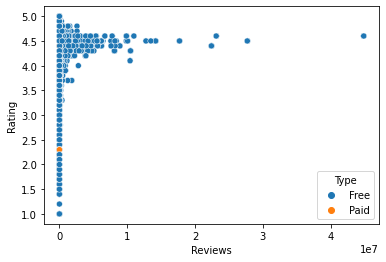

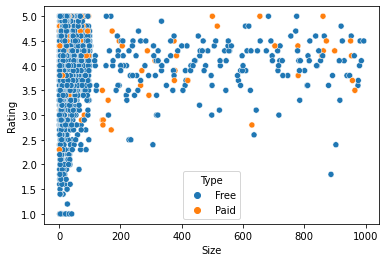

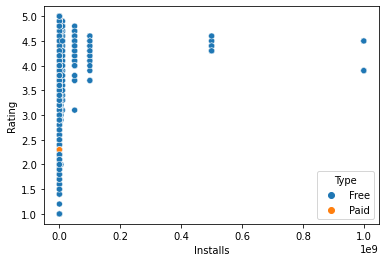

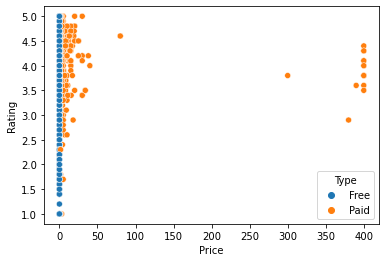

In [17]:
for i in df.columns.drop('Rating'):
    if df[i].dtype != 'object':
        plt.subplots()
        sns.scatterplot(x=i,y='Rating',data=df,hue='Type');

In [18]:
df[df['Type'] == 'Free']['Price'].value_counts()

0.0    7146
Name: Price, dtype: int64

*Eliminating outliers*

In [19]:
df[df['Price'] > 75]['App']

2253         Vargo Anesthesia Mega App
2365         Vargo Anesthesia Mega App
4197            most expensive app (H)
4362                        💎 I'm rich
4367          I'm Rich - Trump Edition
5351                         I am rich
5354                    I am Rich Plus
5355                     I am rich VIP
5356                 I Am Rich Premium
5357               I am extremely Rich
5358                        I am Rich!
5359                I am rich(premium)
5362                     I Am Rich Pro
5364    I am rich (Most expensive app)
5366                         I Am Rich
5369                         I am Rich
5373                I AM RICH PRO PLUS
Name: App, dtype: object

In [20]:
df.drop(df.index[df['Price'] > 75], inplace = True)

*Apps that have more reviews than installs are suspicious and therefore removed*

In [21]:
df['Fraud'] = df['Reviews'] - df['Installs']

In [22]:
df[df['Fraud']>0]['Fraud'].count()

6

In [23]:
df.drop(df.index[df['Fraud'] > 0], inplace = True)

In [24]:
df.drop('Fraud',axis = 1, inplace = True)

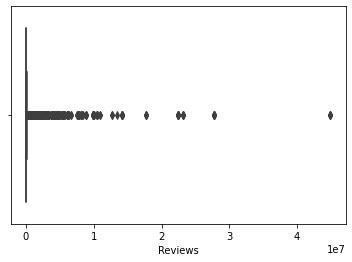

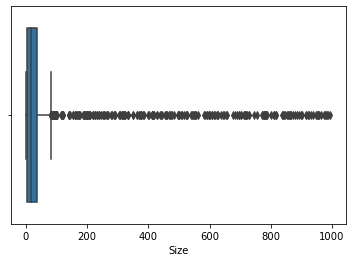

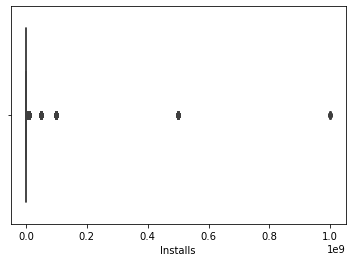

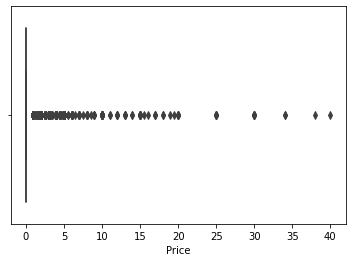

In [25]:
for i in df.columns.drop('Rating'):
    if df[i].dtype != 'object':
        plt.subplots()
        sns.boxplot(x = df[i])

In [26]:
df = df[df['Reviews'] <= 10000000]

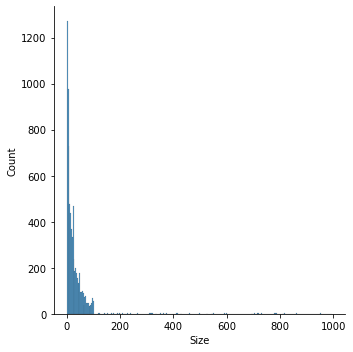

In [27]:
sns.displot(data = df['Size']);

In [28]:
df[df['Size']>150]['App'].values

array(['Restart Navigator', 'GO Notifier', 'Pocket GMAT Math',
       'Pocket SAT Math', 'Mummatikabalkuragi', 'Aviary Effects: Classic',
       'Aviary Stickers: Free Pack', 'Apk Installer',
       'iBP Blood Pressure', 'EMT Study - NREMT Test Prep',
       'Pocket Lab Values', 'OptoDrum', 'CCHT PREP', 'Paramedic Meds',
       'Fever Meter', 'Super Ear Super Hearing', 'NETGEAR WiFi Analytics',
       'ZERO Lock Screen', 'Screen Off and Lock', 'OnePlus Icon Pack',
       'Kairo XP (for HD Widgets)', 'Galactic Core Free Wallpaper',
       'File Explorer', 'Simple Notepad', 'Learn Basic C - For Beginners',
       'Moto LED for Moto X & E [Root]', 'F-Secure AV Test',
       'G Cloud Apps Backup Key * root', 'Dialer theme G Black Gold',
       'J Touch', 'EXO-L', 'GTS-M', 'N-Back',
       'Multiling O Keyboard + emoji',
       'Prime Key for Nougat Launcher& O Launcher &KitKat',
       "Band O'Clock", '.R', 'S Pen Keeper', 'U-Disco', 'A-B repeater',
       '30-Day Ab Challenge Tracker', 'A

In [29]:
df = df[df['Size'] <= 150]

In [30]:
df = df[df['Installs'] <= 150000000]

In [32]:
df = df[df['Price'] <= 50]

In [33]:
num = [i for i in df.columns.drop('Rating') if df[i].dtype != 'object']
num

['Reviews', 'Size', 'Installs', 'Price']

*Use only integers for ratings*

In [34]:
def transform(x):
    if x >= 0 and x <= 1:
        x = 1 
    elif x > 1 and x <= 2:
        x = 2 
    elif x > 2 and x <= 3:
        x = 3
    elif x > 3 and x <= 4:
        x = 4
    elif x > 4 and x <= 5:
        x = 5 
    return x

In [35]:
df['Rating'] = df['Rating'].apply(transform)
df['Rating'].value_counts()

5    5262
4    1833
3     273
2      49
1      16
Name: Rating, dtype: int64

In [36]:
cat = [i for i in df.columns if df[i].dtype == 'object']
cat.remove('App')

*Transform categorical variables*

In [37]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[cat] = enc.fit_transform(df[cat])

In [38]:
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,5,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,159,19.0,10000,0.0,0.0,1.0,9.0
1,4,Coloring book moana,0.0,967,14.0,500000,0.0,0.0,1.0,11.0
2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,87510,8.7,5000000,0.0,0.0,1.0,9.0
3,5,Sketch - Draw & Paint,0.0,215644,25.0,50000000,0.0,0.0,4.0,9.0
4,5,Pixel Draw - Number Art Coloring Book,0.0,967,2.8,100000,0.0,0.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...
10829,4,News Minecraft.fr,21.0,881,2.3,100000,0.0,0.0,1.0,71.0
10833,4,FR Calculator,11.0,7,2.6,500,0.0,0.0,1.0,36.0
10835,5,Sya9a Maroc - FR,11.0,38,53.0,5000,0.0,0.0,1.0,36.0
10836,5,Fr. Mike Schmitz Audio Teachings,11.0,4,3.6,100,0.0,0.0,1.0,36.0


In [39]:
X = df.drop(['App','Rating'],axis=1)

In [40]:
y = df['Rating']

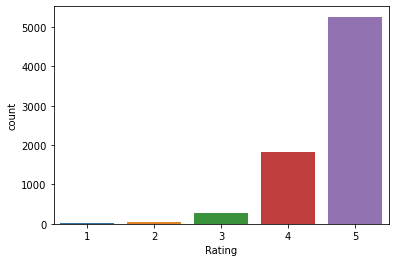

In [41]:
sns.countplot(x = y);

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

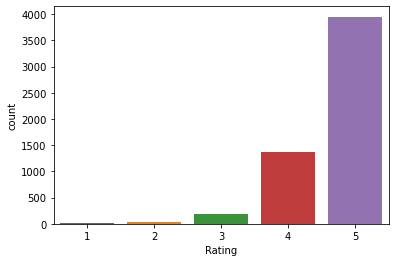

In [43]:
sns.countplot(x = y_train);

*Target variable is highly imbalanced*

In [44]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

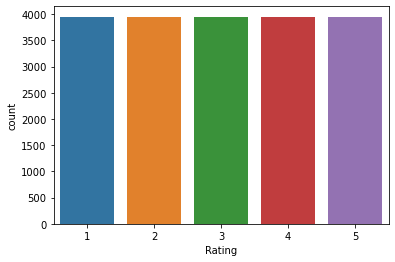

In [45]:
sns.countplot(x = y_train);

*Model 1*

In [46]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.2592791823561054

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, clf.predict(X_test))

array([[  3,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0],
       [ 70,   0,   0,   9,   1],
       [276,   0,   0, 117,  63],
       [629,   0,   0, 321, 362]])

In [48]:
from sklearn.metrics import f1_score

f1_score(y_test, clf.predict(X_test), average='weighted')

0.3575713634817348

In [49]:
from sklearn.metrics import recall_score

recall_score(y_test, clf.predict(X_test), average='weighted')

0.2592791823561055

In [50]:
from sklearn.metrics import precision_score

precision_score(y_test, clf.predict(X_test), average='micro')

0.2592791823561054

*Model 1 is poor at classifying*

In [51]:
from xgboost import XGBClassifier

clf2 = XGBClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)

0.6810112963959117

In [52]:
confusion_matrix(y_test, clf2.predict(X_test))

array([[   0,    0,    0,    0,    3],
       [   0,    0,    1,    3,    4],
       [   0,    9,   12,   22,   37],
       [   1,   10,   28,  133,  284],
       [   2,   14,   35,  140, 1121]])

In [53]:
f1_score(y_test, clf2.predict(X_test), average='weighted')

0.6662474619488914

In [54]:
recall_score(y_test, clf2.predict(X_test), average='weighted')

0.6810112963959117

In [55]:
precision_score(y_test, clf2.predict(X_test), average='weighted')

0.6622700859063916

*In model 2, nearly 70% of the ratings are correctly classified, though there are big differences among them due to the class imbalances*

In [56]:
booster = clf2.get_booster() 
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda : model_bytearray

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


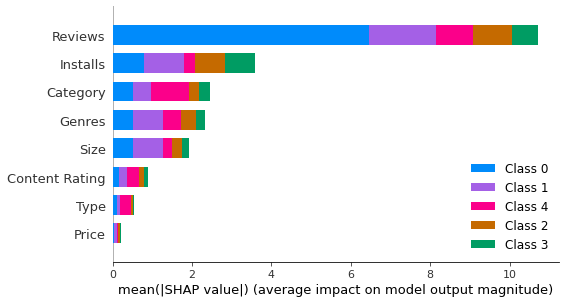

In [57]:
import shap

explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

*Reviews is the variable among the 5 rating classes that has greater importance when classifying ratings*